<a href="https://colab.research.google.com/github/LikhanInSpace/bomFatabo/blob/main/inceptionv3_for_20_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/thesis dataset/test dataset/train'
valid_path = '/content/drive/MyDrive/thesis dataset/test dataset/test'

In [11]:
inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
for layer in inceptionv3.layers:
    layer.trainable = False

In [13]:
folders = glob('/content/drive/MyDrive/thesis dataset/test dataset/train/*')

In [14]:
folders

['/content/drive/MyDrive/thesis dataset/test dataset/train/real',
 '/content/drive/MyDrive/thesis dataset/test dataset/train/fake']

In [15]:
x = Flatten()(inceptionv3.output)

In [16]:

len(folders)

2

In [17]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inceptionv3.input, outputs=prediction)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/thesis dataset/test dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 40 images belonging to 2 classes.


In [22]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/thesis dataset/test dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 40 images belonging to 2 classes.


In [23]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 50s 14s/step - loss: 31.1311 - accuracy: 0.5000 - val_loss: 18.2647 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 1s 313ms/step - loss: 18.3391 - accuracy: 0.4000 - val_loss: 15.5961 - val_accuracy: 0.4750
Epoch 3/20
2/2 [==============================] - 1s 631ms/step - loss: 4.8925 - accuracy: 0.6500 - val_loss: 5.3257 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 1s 623ms/step - loss: 3.9409 - accuracy: 0.6250 - val_loss: 7.0792 - val_accuracy: 0.5500
Epoch 5/20
2/2 [==============================] - 1s 291ms/step - loss: 3.9395 - accuracy: 0.7000 - val_loss: 4.5709 - val_accuracy: 0.5750
Epoch 6/20
2/2 [==============================] - 1s 624ms/step - loss: 1.7205 - accuracy: 0.8000 - val_loss: 3.2886 - val_accuracy: 0.6250
Epoch 7/20
2/2 [==============================] - 1s 287ms/step - loss: 0.4527 - accuracy: 0.8500 - val_loss: 4.3586 - val_accuracy: 0.5750
Epoch 8/20
2/2 [=

In [24]:
import matplotlib.pyplot as plt

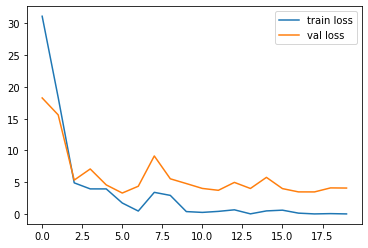

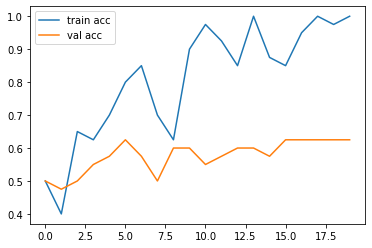

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')